## **Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

## **Understanding Ridge Regression**

**Introduction** <br>
**Ridge Regression** is a technique used in linear regression to address some of the problems of simple linear regression, especially when dealing with multicollinearity (when predictor variables are highly correlated) or when you have a large number of features. <br>
<br>
**What is it?**

*   At its core, Ridge Regression is a type of linear regression that adds a penalty term to the standard least squares objective function. This penalty is proportional to the square of the magnitude of the coefficients.<br><br>

**How does it work?**

*   Simple linear regression aims to minimize the sum of squared errors between the predicted and actual values.
*   Ridge Regression adds a term to this objective function: `alpha * sum(theta^2)`, where `alpha` is a hyperparameter (a value you choose) and `theta` represents the model's coefficients (excluding the intercept).<br><br>

**What is the objective?**

*   The objective of Ridge Regression is to minimize the sum of squared errors *plus* this penalty term. This encourages the model to keep the coefficients small. <br><br>

**Why use it? What problems does it solve?**

Simple linear regression can struggle when:

*   **Multicollinearity:** When predictor variables are highly correlated, it becomes difficult for the model to determine the individual impact of each variable. This can lead to unstable and highly sensitive coefficient estimates. Small changes in the data can result in large changes in the estimated coefficients. Ridge Regression helps by shrinking these coefficients, making them less sensitive to correlations between features.
    *   *Example:* Imagine you are trying to predict house prices and you have two features: the size of the living area in square feet and the size of the house in square meters. These two features are highly correlated because they measure essentially the same thing in different units. In simple linear regression, it's hard to figure out which variable contributes more to the price, leading to unstable coefficient estimates. Ridge Regression can handle this by shrinking the coefficients of both correlated variables.
*   **Overfitting:** When you have a large number of features or a limited amount of data, a linear regression model can fit the training data too closely, capturing noise rather than the underlying pattern. This results in poor performance on new, unseen data. The penalty term in Ridge Regression constrains the size of the coefficients, preventing the model from becoming too complex and thus reducing overfitting. <br><br>

**Effect of the penalty:**

*   The `alpha` parameter controls the strength of the penalty.
*   A small `alpha` means less penalty, and the model will be closer to simple linear regression.
*   A large `alpha` means a stronger penalty, and the coefficients will be shrunk more significantly towards zero. <br><br>

**Betterment compared to simple linear regression:**

*   Ridge Regression often provides better performance than simple linear regression when multicollinearity is present or when dealing with high-dimensional data, as it helps to reduce the variance of the model.<br><br>

**Mechanism: A Deeper Dive with an Example**

In simple linear regression, we minimize the sum of squared errors (SSE):

$SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

where $y_i$ is the actual value, and $\hat{y}_i$ is the predicted value.

In Ridge Regression, we minimize the SSE plus the L2 penalty:

$Objective = SSE + \alpha \sum_{j=1}^{p} \theta_j^2$

where $\alpha$ is the regularization parameter, and $\theta_j$ are the model coefficients (excluding the intercept).

Let's consider a simple example with two features, $x_1$ and $x_2$, and a target variable $y$.

The linear regression model is:

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2$

The Ridge Regression objective is to minimize:

$\sum_{i=1}^{n} (y_i - (\theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2}))^2 + \alpha (\theta_1^2 + \theta_2^2)$

Notice that the bias term ($\theta_0$) is not penalized. The penalty term $\alpha (\theta_1^2 + \theta_2^2)$ forces the model to keep the coefficients $\theta_1$ and $\theta_2$ small. If $\alpha$ is large, the model will strongly prefer smaller coefficients, even if it slightly increases the SSE. This trade-off between minimizing SSE and keeping coefficients small is the core of Ridge Regression.
<br> <br>

In short, Ridge Regression is a regularization technique that adds a penalty to the linear regression model to shrink coefficients and improve its stability and generalization, especially in the presence of multicollinearity or high-dimensional data.

### **Why Minimize or Shrink Coefficients?**

Imagine you're trying to predict a value based on a few features. In simple linear regression, the model finds the best fit by assigning weights (coefficients) to each feature. If a feature has a very large coefficient, it means that even a small change in that feature's value will cause a big change in the predicted value.

**Shrinking coefficients helps to:**

*   **Stabilize the model:** By penalizing large coefficients, Ridge Regression encourages the model to distribute the impact of correlated features more evenly.
*   **Reduce the influence of noisy features:** Features that are just capturing random noise in the training data will have their coefficients shrunk towards zero, reducing their impact on predictions.
*   **Improve generalization:** A model with smaller coefficients is generally less sensitive to small variations in the input data, making it more likely to perform well on data it hasn't seen before.

**Effect of L2 Penalty (Ridge Regularization):**

The L2 penalty adds a cost based on the squared values of the coefficients. The optimization process tries to find coefficients that minimize both the error in prediction and this penalty.

*   **Before L2:** Without the penalty, the model can assign very large coefficients to minimize the error on the training data, even if it leads to a complex and unstable model.
*   **After L2:** The penalty term makes large coefficients "expensive". To minimize the total cost (error + penalty), the model is forced to find a balance, often resulting in smaller, more stable coefficients. This shrinkage helps to prevent the model from becoming too sensitive to individual features or noise.

**Simple Example:**

Let's say you have a small dataset with one feature `X` and a target `y`.

| X | y |
|---|---|
| 1 | 3 |
| 2 | 5 |
| 3 | 7 |

A simple linear regression might find a model like `y = 1 + 2 * X`. The coefficient for X is 2.

Now imagine you add a lot of noise to the data:

| X | y' |
|---|---|
| 1 | 3.2 |
| 2 | 4.8 |
| 3 | 7.1 |

Simple linear regression might find a model like `y' = 0.8 + 2.2 * X` to perfectly fit the noisy data. The coefficient for X is now 2.2. It's slightly larger and more sensitive to the noise.

With Ridge Regression, the objective is to minimize $(y - (theta_0 + theta_1 * X))^2 + alpha * theta_1^2$. The alpha term penalizes the size of `theta_1`. If you choose a suitable `alpha`, the model might find coefficients closer to the original `y = 1 + 2 * X` model, even with the noisy data, because the penalty discourages the larger coefficient needed to perfectly fit the noise. This leads to a more robust model.

## **Generating & Exploring the Dataset**

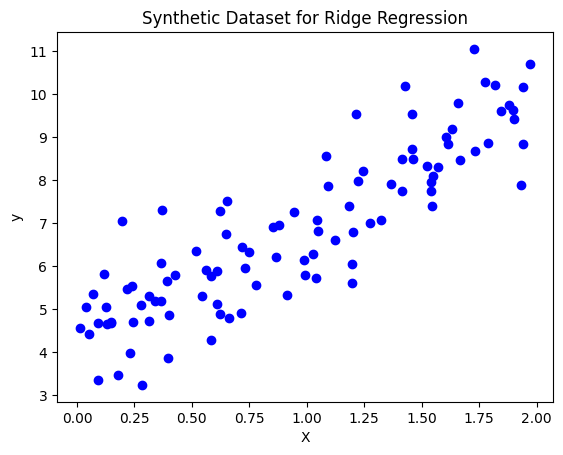

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)
# Generate 100 random numbers between 0 and 2 for X
X = 2 * np.random.rand(100, 1)
# Generate y which have linear relationship with X and adds a noise
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the generated data
plt.scatter(X, y, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Dataset for Ridge Regression")
plt.show()

## **Custom Ridge Regression**

In [ ]:
class RidgeRegression:
  def __init__(self, alpha=0.1, learning_rate=0.01, n_iterations=1000):
    # Regularization strength
    self.alpha = alpha
    # Step size for gradient descent
    self.learning_rate = learning_rate
    # Number of iterations for gradient descent
    self.n_iterations = n_iterations
    # Model parameters (weights)
    self.theta = None

  def fit(self, X, y):
    # Storing number of training examples or instances and features
    m, n = X.shape

    # Add a bias term to the input features
    x_with_bias = np.c_[np.ones((m, 1)), X]

    # Initialize model parameters (weights) to zeros
    self.theta = np.zeros((n+1, 1))

    # Reshape the target variable
    y_reshaped = y.reshape(-1, 1)

    # Gradient Descent
    for i in range(self.n_iterations):
      # Calculate predicted values
      y_pred = x_with_bias.dot(self.theta)

      # Calculate the error (difference between predicted and actual values)
      error = y_pred - y_reshaped

      # Calculate the gradient of the Mean Squared Error
      mse_gradient = (1/m) * x_with_bias.T.dot(error)

      # Calculate the gradient of the L2 penalty (Ridge regularization)
      l2_penalty_gradient = (self.alpha/m) * self.theta.copy()
      l2_penalty_gradient[0] = 0  # Exclude the bias term from regularization

      # Calculate the total gradient (MSE gradient + L2 penalty gradient)
      total_gradient = mse_gradient + l2_penalty_gradient

      # Update the model parameters using the gradient and learning rate
      self.theta -= self.learning_rate * total_gradient

  def predict(self, X):
    # Make predictions using the trained model
    m = X.shape[0]  # Number of examples for prediction

    # Add a bias term to the input features
    x_with_bias = np.c_[np.ones((m, 1)), X]

    # Calculate and return the predicted values
    return x_with_bias.dot(self.theta)

## **Step-by-Step Custom Ridge Regression on a Small Dataset**

Let's apply our custom `RidgeRegression` implementation to a small dataset and examine the steps within the `fit` method.

In [ ]:
# Create a small dataset
X_small = np.array([[1], [2], [3], [4], [5]])
y_small = np.array([[3], [5], [7], [9], [11]])

# Initialize the custom Ridge Regression model
ridge_small_step_by_step = RidgeRegression(alpha=0.1, learning_rate=0.01, n_iterations=1) # Set iterations to 1 for demonstration

# --- Step-by-step execution of the fit method ---

# 1. Storing number of training examples or instances (m) and features (n)
m, n = X_small.shape
# Output: m = 5, n = 1

# 2. Add a bias term to the input features
x_with_bias = np.c_[np.ones((m, 1)), X_small]
# Output: x_with_bias = [[1. 1.]
#                        [1. 2.]
#                        [1. 3.]
#                        [1. 4.]
#                        [1. 5.]]

# 3. Initialize model parameters (weights) to zeros
theta = np.zeros((n+1, 1))
# Output: theta = [[0.]
#                  [0.]]

# 4. Reshape the target variable
y_reshaped = y_small.reshape(-1, 1)
# Output: y_reshaped = [[ 3]
#                       [ 5]
#                       [ 7]
#                       [ 9]
#                       [11]]

# Gradient Descent (demonstrating the first iteration)
# for i in range(self.n_iterations): # Looping for n_iterations times
# Calculate predicted values
y_pred = x_with_bias.dot(theta)
# Output: y_pred = [[0.]
#                   [0.]
#                   [0.]
#                   [0.]
#                   [0.]]

# Calculate the error (difference between predicted and actual values)
error = y_pred - y_reshaped
# Output: error = [[-3.]
#                  [-5.]
#                  [-7.]
#                  [-9.]
#                 [-11.]]

# Calculate the gradient of the Mean Squared Error
mse_gradient = (1/m) * x_with_bias.T.dot(error)
# Output: mse_gradient = [[ -7. ]
#                       [-25. ]]

# Calculate the gradient of the L2 penalty (Ridge regularization)
# We need a copy of theta for this calculation to avoid modifying the original theta too early
theta_copy = theta.copy()
l2_penalty_gradient = (ridge_small_step_by_step.alpha/m) * theta_copy
l2_penalty_gradient[0] = 0  # Exclude the bias term from regularization
# Output: l2_penalty_gradient = [[0.  ]
#                             [0.02]]

# Calculate the total gradient (MSE gradient + L2 penalty gradient)
total_gradient = mse_gradient + l2_penalty_gradient
# Output: total_gradient = [[ -7.  ]
#                          [-24.98]]

# Update the model parameters using the gradient and learning rate
theta -= ridge_small_step_by_step.learning_rate * total_gradient
# Output after first iteration: theta = [[0.07   ]
#                                       [0.2498 ]]

# Note: In the actual fit method, this process repeats for n_iterations.
# After the loop, self.theta is updated with the final theta.
ridge_small_step_by_step.theta = theta

print("Theta after 1 iteration:", ridge_small_step_by_step.theta)

Theta after 1 iteration: [[0.07]
 [0.25]]


## **Training & Evaluating Custom Ridge Regression**

In [ ]:
# Creating Instance of our Custom ridge regression
ridge_scratch = RidgeRegression(alpha=0.1, learning_rate=0.1, n_iterations=1000)
# Fit(Trianing) the model
ridge_scratch.fit(X,y)
# Predicting using the model
y_pred_scratch = ridge_scratch.predict(X)

In [ ]:
# Evaluate
print("Scratch Ridge Regression:")
print("MSE:", mean_squared_error(y, y_pred_scratch))
print("R²:", r2_score(y, y_pred_scratch))

Scratch Ridge Regression:
MSE: 0.8066063349755334
R²: 0.7692673136849802


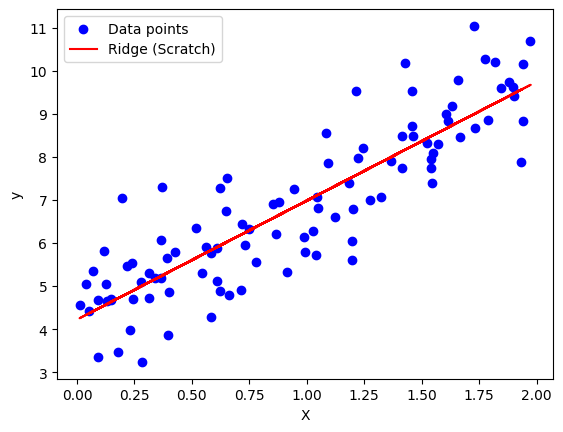

In [ ]:
# Plot results
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred_scratch, color="red", label="Ridge (Scratch)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## **Sklearn Ridge Regression**

In [ ]:
# Train Ridge using sklearn and Predict
ridge_sklearn = Ridge(alpha=1.0)
ridge_sklearn.fit(X, y)
y_pred_sklearn = ridge_sklearn.predict(X)

In [ ]:
# Evaluate sklearn model
print("\nScikit-learn Ridge Regression:")
print("MSE:", mean_squared_error(y, y_pred_sklearn))
print("R²:", r2_score(y, y_pred_sklearn))


Scikit-learn Ridge Regression:
MSE: 0.808654322230498
R²: 0.7686814794553355


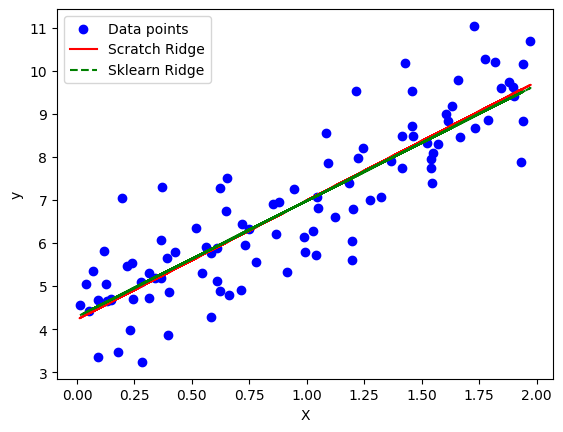

In [ ]:
# Plot comparison
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred_scratch, color="red", label="Scratch Ridge")
plt.plot(X, y_pred_sklearn, color="green", linestyle="--", label="Sklearn Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## **Effect of Ridge**

In [ ]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

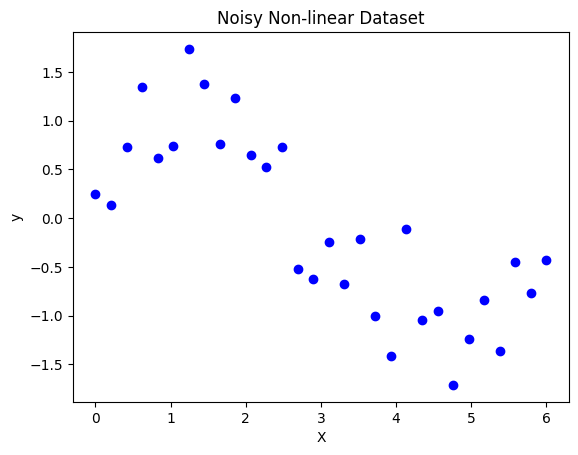

In [ ]:
# Here a dataset is created with some noise so the effect of Ridge is more visible.

np.random.seed(42)
X = np.linspace(0, 6, 30).reshape(-1, 1)
y = np.sin(X) + np.random.randn(30, 1) * 0.5   # sine curve with noise

plt.scatter(X, y, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Noisy Non-linear Dataset")
plt.show()

Linear Regression (degree=15):
MSE: 0.12000591744781268
R²: 0.8592159320323882
 


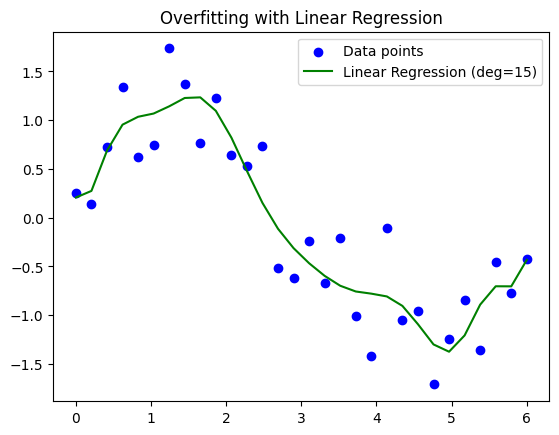

In [ ]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=15, include_bias=False)

# Create a pipeline for Linear Regression with polynomial features
lin_model = make_pipeline(poly_features, LinearRegression())
# Fit the model to the data
lin_model.fit(X, y)
# Predict using the model
y_lin = lin_model.predict(X)

# Evaluate
print("Linear Regression (degree=15):")
print("MSE:", mean_squared_error(y, y_lin))
print("R²:", r2_score(y, y_lin))
print(" ")

# Plot the original data and the best fit line generated by the linear regression odel
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_lin, color="green", label="Linear Regression (deg=15)")
plt.legend()
plt.title("Overfitting with Linear Regression")
plt.show()

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.59142e-23): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)



Ridge Regression (degree=15, alpha=10):
MSE: 0.14086227691766032
R²: 0.834748445831661
 


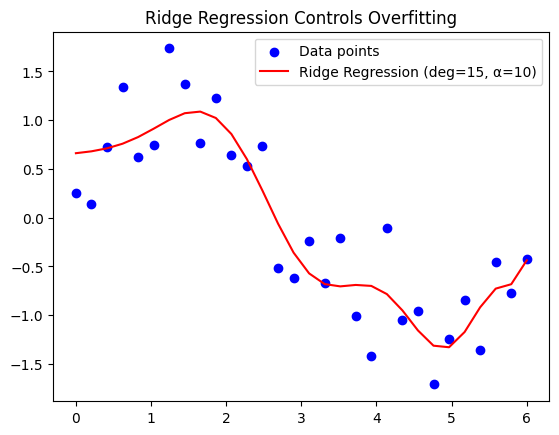

In [ ]:
# Using Ridge Model
ridge_model = make_pipeline(poly_features, Ridge(alpha=10))  # strong regularization
ridge_model.fit(X, y)
y_ridge = ridge_model.predict(X)

# Evaluate
print("\nRidge Regression (degree=15, alpha=10):")
print("MSE:", mean_squared_error(y, y_ridge))
print("R²:", r2_score(y, y_ridge))
print(" ")

plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_ridge, color="red", label="Ridge Regression (deg=15, α=10)")
plt.legend()
plt.title("Ridge Regression Controls Overfitting")
plt.show()


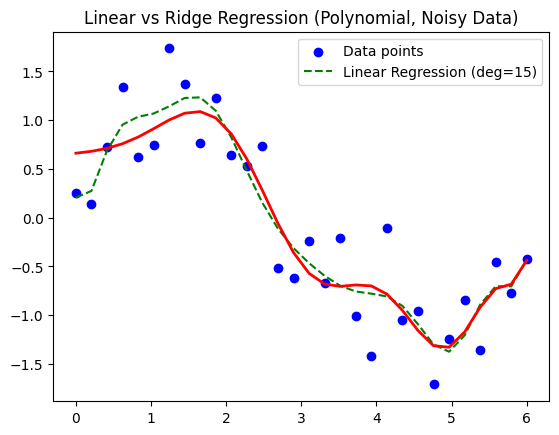

In [ ]:
# Comparing the best fit line of Linear Regression and Rdige Regression
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_lin, color="green", linestyle="--", label="Linear Regression (deg=15)")
plt.legend()
plt.plot(X, y_ridge, color="red", linewidth=2, label="Ridge Regression (deg=15, α=10)")
plt.title("Linear vs Ridge Regression (Polynomial, Noisy Data)")
plt.show()
